# LAB 1 - EVA MANRIQUE SANZ 
### (Ejercicios al final del notebook)

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Ch 1: INFORMATION THEORY

Outline:
1. Entropy
   1. Entropy for discrete distribution
   2. Cross Entropy
   3. Joint Entropy
   4. Conditional Entropy
   5. Mutual Information
2. Entropy for continuous functions
3. KL Divergence
4. Applications
   1. Normalized Mutual Information
   2. Source Code and Channel Th.


Machine learning is fundamentally about information processing. 

**What is information, and how do we measure it?**

Ultimately we need a way to quantify the magnitude of an update from one set of beliefs to another

## 1. Entropy

The **entropy of a probability** distribution can be interpreted as a **measure of uncertainty, or lack
of predictability**, associated with a random variable drawn from a given distribution.

We can also use entropy to define the **information content of a data source**. 

***Example***

Suppose we observe a sequence of symbols $X_n ∼ p$ generated from distribution $p$:
- If **$p$ has high entropy**, it will be **hard to predict** the value of each observation Xn. Hence we say that the dataset D has high information content. 
- By contrast, if p is a degenerate **distribution with 0 entropy** (the minimal value), then every $X_n$ will be the same, so D **does not contain much information**.

*Note: All of this can be formalized in terms of data compression*

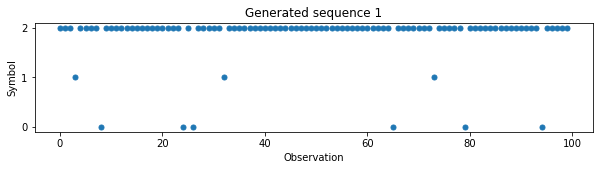

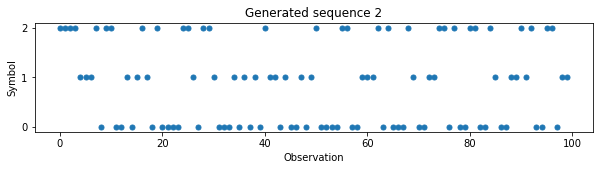

In [1]:
## EXAMPLE OF SEQUENCES GENERATED FROM A PROBABILITY DISTRIBUTION

import numpy as np
import matplotlib.pyplot as plt

# Define the probability distribution p
p = [0.1, 0.1, 0.8]  # Example probabilities, should sum up to 1

# Generate a sequence of symbols Xn from distribution p
n = 100  # Number of observations
Xn = np.random.choice(len(p), size=n, p=p)

# Plot the generated sequence
plt.figure(figsize=(10, 2))
plt.plot(Xn, 'o', markersize=5)
plt.yticks([0, 1, 2])
plt.xlabel("Observation")
plt.ylabel("Symbol")
plt.title("Generated sequence 1")
plt.show()

# Define the probability distribution p
p = [0.4, 0.3, 0.3]  # Example probabilities, should sum up to 1

# Generate a sequence of symbols Xn from distribution p
n = 100  # Number of observations
Xn = np.random.choice(len(p), size=n, p=p)

# Plot the generated sequence
plt.figure(figsize=(10, 2))
plt.plot(Xn, 'o', markersize=5)
plt.yticks([0, 1, 2])
plt.xlabel("Observation")
plt.ylabel("Symbol")
plt.title("Generated sequence 2")
plt.show()


### 1.1 Entropy for discrete random variables

The entropy of a discrete random variable $X$ with distribution $p$ over $K$ states is defined by
$$
\mathbb{H}(X) = -\sum_{k=1}^{K} p(X = k) \log_2 p(X = k) 
$$

Usually we use log base 2, in which case the units are called *bits* (short for binary digits). For log with base $e$ gives *nats* (natural units)


EXAMPLE: Entropy calculation for sequence 1 (Seen before)

In [2]:
# Define the probability distribution p
p = [0.1, 0.1, 0.8]  # Example probabilities, should sum up to 1

# Products for all states
print(p * np.log2(p))

[-0.33219281 -0.33219281 -0.25754248]


In [3]:
# Calculate the entropy of p summing the products
entropy = -np.sum(p * np.log2(p))
print(f"Entropy of p: {entropy}")

# We can also use the scipy library to calculate the entropy
import scipy.stats as stats
print(f"Entropy with scipy: {stats.entropy(p, base=2)}")

Entropy of p: 0.9219280948873623
Entropy with scipy: 0.9219280948873624


**Exercise**

1. Calculate entropy for variable $X\in \{0,1,2\}$ with distribution $p = [0.4, 0.3, 0.3]$

2. ¿Which is the discrete distribution for 3 states with maximum entropy?

3. ¿And the one with minimum entropy?

Verify the results numerically

In [4]:
# Ejercicio 1
p= [0.4, 0.3, 0.3]
# print(p*np.log2(p))

entropy = -np.sum(p * np.log2(p))
print(f"Entropy of p: {entropy}")

import scipy.stats as stats
print(f"Entropy with scipy: {stats.entropy(p, base=2)}")

#Ejercicio 2
p_max_entropy = [1/3, 1/3, 1/3]

#Ejercicio 3 
p_min_entropy = [1, 0, 0] # o [0, 1, 0] o [0, 0, 1]



Entropy of p: 1.5709505944546684
Entropy with scipy: 1.570950594454669


**NOTE**: Estimating the entropy of a random variable with many possible states requires estimating its
distribution, which can require a lot of data

**Binary random variables**

For the special case of binary random variables, $X \in \{0, 1\}$, we can write $p(X = 1) = \theta$ and
$p(X = 0) = 1 − \theta$. 

Hence the entropy becomes

$$
\mathbb{H}(X) = −[p(X = 1) log_2 p(X = 1) + p(X = 0) log_2 p(X = 0) ] 
$$
$$
= −[θ log_2 θ + (1 − θ) log_2(1 − θ)]
$$

This is called the **binary entropy function**, and is also written $\mathbb{H}(\theta)$.

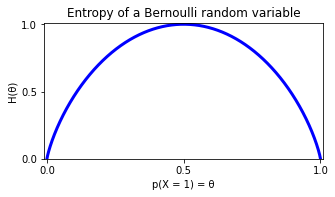

In [5]:
x = np.linspace(0, 1, 10000)

H = lambda x: -(x * np.log2(x) + (1 - x) * np.log2(1 - x))

#remove the warning
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(5, 2.5))
plt.plot(x, H(x), "-b", lw=3)
plt.xlim((-0.01, 1.01))
plt.ylim((0, 1.01))

plt.xlabel("p(X = 1) = θ")
plt.ylabel("H(θ)")

ticks = [0, 0.5, 1]
plt.title("Entropy of a Bernoulli random variable")
plt.xticks(ticks)
plt.yticks(ticks)
plt.show()

# activate warnings again
warnings.filterwarnings("default")


### 1.2 Cross Entropy

The **cross entropy** between distribution $p$ and $q$ is defined by
$$
\mathbb{H}_{\text{ce}}(p, q) = -\sum_{k=1}^{K} p_k \log q_k
$$
INTERPRETATION: cross entropy is the **expected number of bits needed to compress some data
samples drawn from distribution $p$ using a code based on distribution $q$**. 

This can be minimized by setting $q = p$, in which case the expected number of bits of the optimal code is $\mathbb{H}_{\text{ce}}(p, p) = \mathbb{H}(p)$
this is known as **Shannon’s source coding theorem**

In [6]:
# Example distributions
p = np.array([0.2, 0.3, 0.5])
q = np.array([0.4, 0.4, 0.2])
# Calculate cross entropy
ce = -np.sum(p * np.log2(q))
print(f"Cross entropy between p and q: {ce}")

Cross entropy between p and q: 1.8219280948873622


C:\Users\evama\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Binary Classification Example: Email Spam Detection**

Imagine you are building a binary classification model to detect whether an email is spam or not spam: $Y \in \{NO,YES\}$ 

- **True Distribution (p):** Let’s say the actual label of an email is "spam." The true distribution could be represented as $p = [0, 1]$

- **Predicted Distribution (q):** Suppose your model predicts that the probability of the email being spam is 0.8 and not spam is 0.2. Then , the predicted distribution is $p = [0.2, 0.8]$

The cross-entropy loss for this single prediction is calculated using the formula for binary cross-entropy:
$$
\mathbb{H}_{\text{ce}}(p, q) = - (1 \times \log(0.8) + (0 \times \log(0.2))) = -\log(0.8) \approx 0.223
$$

**The lower the cross-entropy, the better the model’s predictions align with the actual labels**
Here, a cross-entropy of 0.223 indicates a fairly confident and correct prediction.

### 1.3 Joint Entropy
Given **two discrete random variables** X and Y, the **joint entropy** is defined as
$$
H(X, Y) = -\sum_{x, y} p(x, y) \log_2 p(x, y)
$$
where $p(x, y)$ is the bivariate probability distribution
Properties:
- If X and Y are independent, then
$$H(X, Y ) = H(X) + H(Y )$$
- Bounds
$$ H(X, Y) \geq \max\{H(X), H(Y)\} \geq 0 $$

**Example**: 

Consider choosing an integer from 1 to 8, $n\in{1, . . . , 8}$. 
Let $X(n) = 1$ if $n$ is even, and $Y(n) = 1$ if $n$ is prime

The table of possible situations is:
| $n$ | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|:--|:--|:--|:--|:--|:--|:--|:--|:--|
| $X$ | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 |
| $Y$ | 0 | 1 | 1 | 0 | 1 | 0 | 1 | 0 |

Hence, the joint distribution is:

| $p(X, Y)$ | $Y = 0$ | $Y = 1$ |
|-------------|-----------|-----------|
| $X = 0$   | $\frac{1}{8}$ | $\frac{3}{8}$ |
| $X = 1$   | $\frac{3}{8}$ | $\frac{1}{8}$ |


In [7]:
# Define the joint probability distribution p(x, y)
p_xy = np.array([[1/8, 3/8],
                 [3/8, 1/8]])

# Calculate the joint entropy H(X, Y)
joint_entropy = -np.nansum(p_xy * np.log2(p_xy))

# Print the result
print(f"Joint entropy of X and Y: {joint_entropy}")


Joint entropy of X and Y: 1.811278124459133


 **Exercise**: Compare with entropy for the individual distributions


*Note: Recall that the marginal distribution of $p(x,y)$ with respect to $X$ variable is $p_X(x) = \sum_{x} p(x, y)$*

In [8]:
p_xy_x = p_xy.sum(axis = 0)
p_xy_y = p_xy.sum(axis = 1)

entropy_x = -np.sum(p_xy_x * np.log2(p_xy_x))
print(f"Entropy of p_x: {entropy_x}")

entropy_y = -np.sum(p_xy_y * np.log2(p_xy_y))
print(f"Entropy of p_y: {entropy_y}")



Entropy of p_x: 1.0
Entropy of p_y: 1.0


**Exercise**: Create a joint distribution matrix for independent data and verify the results based on entropies

In [9]:
######### SOLUTION #########
# Define the joint probability distribution p(x, y)
p_xy = np.array([[2/8, 2/8],
                 [2/8, 2/8]])
p_xy = np.array([[4/8, 0],
                 [0, 4/8]])
p_xy = np.array([[0, 4/8],
                 [4/8, 0]])
# Calculate the joint entropy H(X, Y)
joint_entropy = -np.sum(p_xy * np.log2(p_xy, where=p_xy != 0))
# Print the result
print(f"Joint entropy of X and Y: {joint_entropy}")
# Calculate the marginal distributions p_x and p_y
p_x = p_xy.sum(axis=1)
p_y = p_xy.sum(axis=0)
# Calculate the entropies of the marginal distributions 
entropy_p_x = -np.sum(p_x * np.log2(p_x, where=p_x != 0))
entropy_p_y = -np.sum(p_y * np.log2(p_y, where=p_y != 0))
# Print the results
print(f"Entropy of p_x: {entropy_p_x}")
print(f"Entropy of p_y: {entropy_p_y}")
print(f"Entropy of p_xy: {joint_entropy}")
print(f"Entropy of p_x + p_y: {entropy_p_x + entropy_p_y}")

Joint entropy of X and Y: 1.0
Entropy of p_x: 1.0
Entropy of p_y: 1.0
Entropy of p_xy: 1.0
Entropy of p_x + p_y: 2.0


### 1.4 Conditional Entropy
The conditional entropy of $Y$ given $X$ is the uncertainty we have in $Y$ after seeing $X$, averaged
over possible values for $X$:

$$
\mathbb{H}(Y \mid X) = 
$$

$$
= \sum_{x} p(x) \mathbb{H}(p(Y \mid X = x)) = -\sum_{x} p(x) \sum_{y} p(y \mid x) \log p(y \mid x)
$$


$$
= -\sum_{x, y} p(x, y) \log p(x, y) + \sum_{x} p(x) \log p(x)
$$

$$
= \mathbb{H}(X, Y) - \mathbb{H}(X)
$$

Properties
- If $Y$ is a deterministic function of $X$, then knowing $X$ completely determines $Y$ , so $H(Y |X) = 0$.
- If $X$ and $Y$ are independent, knowing $X$ tells us nothing about $Y$ and $H(Y |X) = H(Y )$.
- Hence: $H(Y |X) ≤ H(Y)$

This shows that, on average, conditioning on data never increases one’s uncertainty.

In [10]:
# Example about conditional entropy
# Define the joint probability distribution p(x, y)
p_xy = np.array([[1/8, 3/8],
                 [3/8, 1/8]])
# Calculate the marginal distributions p_x and p_y
p_x = p_xy.sum(axis=1)
p_y = p_xy.sum(axis=0)

# Calculate the conditional entropy H(Y|X
conditional_entropy = -np.sum(p_xy * np.log2(p_xy), where=p_xy != 0) + np.sum(p_x * np.log2(p_x))
print(f"Conditional entropy of X given Y: {conditional_entropy}")

# Also calculate the conditional entropy by obtaining the conditional distribution normalizing the joint distribution
p_y_given_x = p_xy / p_x[:, None]
print("Conditional distribution p(y|x):")
print(p_y_given_x)
conditional_entropy = -np.sum(p_xy * np.log2(p_y_given_x), where=p_xy != 0)
print(f"Conditional entropy of X given Y: {conditional_entropy}")


Conditional entropy of X given Y: 0.8112781244591329
Conditional distribution p(y|x):
[[0.25 0.75]
 [0.75 0.25]]
Conditional entropy of X given Y: 0.8112781244591328


### 1.5 Perplexity

The perplexity of a discrete probability distribution p is defined as

$perplexity(p) = 2^{H(p)}$

This is often interpreted as a measure of predictability.

### 1.6 Mutual Information

How should we measure how dependant two random variables are? 

We could measure the similarity of their distributions. This gives rise to the notion of mutual information (MI) between two random
variables

The mutual information (MI) between rv’s X and Y is defined as follows:
$$
I(X; Y) = \sum_{y \in Y} \sum_{x \in X} p(x, y) \log \frac{p(x, y)}{p(x)p(y)}
$$

Properties:
- MI non-negative
- MI $= I(X; Y) = 0$ iff $p(x, y) = p(x)p(y)$.
- MI measures the information gain if we update from a model that treats the two variables as independent $p(x)p(y)$ to one that models their true joint density $p(x, y)$.
  - $I (X; Y ) = H(X) + H(Y ) − H(X, Y )$
- MI between X and Y is the reduction in uncertainty about X after observing Y (and viceversa)
  - $I (X; Y ) = H(X) − H(X|Y ) = H(Y ) − H(Y |X)$

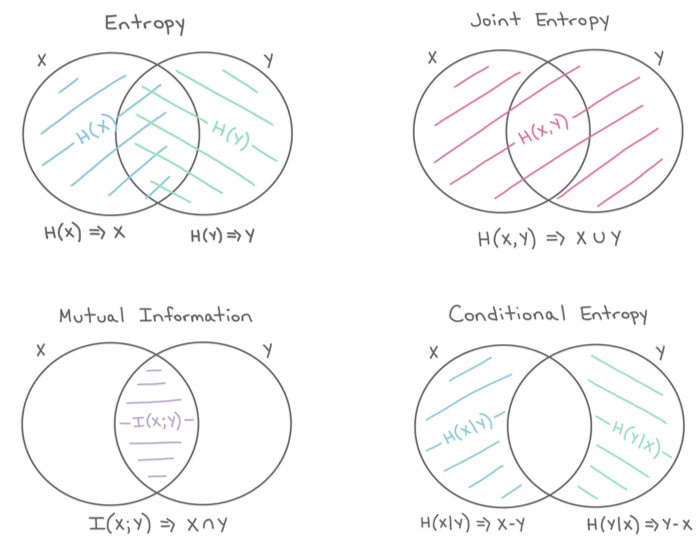

In [11]:
# en join entropy solo se cuenta lo del medio UNA vez

**Example**

Reconsider the example concerning prime and even numbers. Obtain the mutual information between $X$ and $Y$

In [12]:
# Calculate the mutual information I(X;Y)
mutual_information = np.sum(p_xy * np.log2(p_xy / (p_x * p_y), where=p_xy != 0))
print(f"Mutual information of X and Y: {mutual_information}")


Mutual information of X and Y: 0.18872187554086717


**ADITIONAL: Conditional Mutual Information** $I(X;Y|Z)$

Conditional MI is the extra (residual) information that X tells us about Y , excluding what we already knew about Y given Z alone.

## 2 Entropy for continous random variables (Differential Entropy)

If $X$ is a continuous random variable with pdf $p(x)$, we define the differential entropy as
$$
h(X) = -\int_X p(x) \log{p(x)}  \, dx
$$
assuming this integral exists. 

Unlike the discrete case, differential entropy can be negative. This is because pdf’s can be bigger than 1.

**Entropy of a Gaussian**

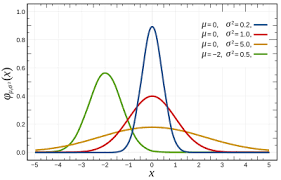

For a univariate gaussian distribution, the entropy can be calculated analitically as:
$$ h(\mathcal{N}(\mu, \sigma^2)) = \frac{1}{2} \ln \left( 2 \pi e \sigma^2 \right) $$

In the multivariate case:
$$ h(\mathcal{N}(\mu, \Sigma)) = \frac{1}{2} \ln \left| 2 \pi e \Sigma \right| $$



**Differential entropy approximation**

In general, computing the differential entropy for a continuous random variable can be difficult. 

Two approaches:
- **Discretize or quantize the variables**: Bin the distribution based on
its empirical quantiles. the technique of discretization does not scale well if $X$ is a
multi-dimensional random vector, due to the curse of dimensionality.

- **Approximate using K-nearest neighbor** distantes to estiate densities non-parametrically. This is the basis for the MI estimator in [sklearn mutual_info_regression](sklearn.feature_selection.mutual_info_regression])

**Example: Entropy of a Gaussian**

In [13]:
# Define the mean and standard deviation of the Gaussian distribution
mean = 0
std = 1

#-- Calculate the entropy of the Gaussian distribution through the formula
entropy = 0.5 * np.log(2 * np.pi * np.e * std ** 2)
print(f"Entropy of the Gaussian distribution through formula: {entropy}")

#-- Calculate the entropy of the Gaussian distribution through the scipy library
# Create a normal distribution object and calculate the entropy
dist = stats.norm(mean, std)
entropy = dist.entropy() 
print(f"Entropy of the Gaussian distribution through scipi: {entropy}")



Entropy of the Gaussian distribution through formula: 1.4189385332046727
Entropy of the Gaussian distribution through scipi: 1.4189385332046727


Differential entropy: 1.3927709285144128


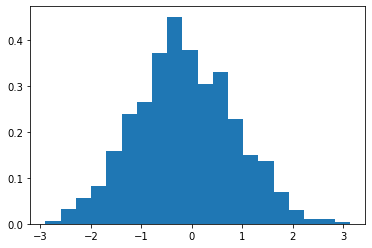

In [14]:
#-- Calculate the entropy of the Gaussian distribution through quantization
# obtain samples from the Gaussian distribution
y = np.random.normal(mean, std, 1000)
# Determine the number of quantiles or bins
num_quantiles = 20

# obtain histogram from y and bin width
prob_counts, bins= np.histogram(y, bins=num_quantiles, density=True)
bin_width = bins[1] - bins[0]

# Calculate the differential entropy
entropy = -np.sum(prob_counts * np.log(prob_counts, where=prob_counts!=0))  * bin_width
print(f"Differential entropy: {entropy}")

#plot histogram
plt.bar(bins[:-1], prob_counts, width=bin_width)
plt.show()

**Exercise**

1. Explore changing the number of samples (low number and high number) and the number of bins. Do the entropy estimated vary much from the true one?
2. Calculate the differential entropy form the "petal_length" variables in "iris" dataset. Plot histogram to decide number of bins.

In [15]:
import seaborn as sns
data = sns.load_dataset("iris")
y = data["petal_length"]

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


## 3. KL Divergence

Given two distributions $p$ and $q$, it is often useful to define a distance metric to measure how
“close” or “similar” they are.

In fact, we will be more general and consider a divergence measure $D(p, q)$ which quantifies how far $q$ is from $p$:
-  $D(p, q) ≥ 0$ with equality iff $p = q$

Kullback-Leibler divergence or KL divergence, also known as the information gain or relative entropy, between
two distributions $p$ and $q$.
For discrete distributions, the KL divergence is defined as follows:

$$ D_{KL}(p \parallel q) = \sum_{k=1}^{K} p_k \log \frac{p_k}{q_k} $$

This naturally extends to continuous distributions as well:

$$ D_{KL}(p \parallel q) = \int dx \, p(x) \log \frac{p(x)}{q(x)} $$


We can rewrite the KL as follows 
$$
D_{KL}(p \parallel q) = \sum_{k=1}^{K} p_k \log p_k - \sum_{k=1}^{K} p_k \log q_k
$$


the first term is the negative entropy ($-H(p)$) and the second term is the cross entropy $H_{ce}(p, q)$.

It can be shown that the cross entropy $H_{ce}(p, q)$ is a lower bound on the number of bits needed to
compress data coming from distribution $p$ if your code is designed based on distribution $q$

We can interpret the KL divergence as the “extra number of bits” you need to pay when compressing
data samples if you use the incorrect distribution $q$ as the basis of your coding scheme compared to
the true distribution $p$.

Suppose we want to find the distribution q that is as close as possible to p, as measured by KL
divergence

It can be shown that minimizing KL divergence to the empirical distribution is equivalent to maximizing likelihood.

## 4 Applications

### 4.1 Normalized mutual information

For some applications, it is useful to have a normalized measure of dependence, between 0 and 1. For example, **MI can be used as a "Generalized correlation coefficient"**

Therefore we can define the **normalized mutual information** as follows:

$$ NMI(X, Y) = \frac{I(X; Y)}{\min(\mathcal{H}(X), \mathcal{H}(Y))} \leq 1 $$

This normalized mutual information ranges from 0 to 1.
- When $ NMI(X, Y) = 0 $, we have $ I(X; Y) = 0 $, so $X$ and $Y$ are independent. 
- When $ NMI(X, Y) = 1 $, and $ \mathcal{H}(X) < \mathcal{H}(Y) $, we have:

$$ I(X; Y) = \mathcal{H}(X) - \mathcal{H}(X | Y) = \mathcal{H}(X) \implies \mathcal{H}(X | Y) = 0 $$ 

**Easy to calculate for discrete variables, difficult for continuous variables**. Used in Clustering to measure cluster quality.


*NOTE: Another alternative is the Maximal Information Coefficient (MIC) implemented in [MICE](https://minepy.readthedocs.io/en/latest/python.html)*

*NOTE 2: Mutual inforamtion estimator through KNN for continuous variables: [sklearn mutual_info_regression](sklearn.feature_selection.mutual_info_regression])*

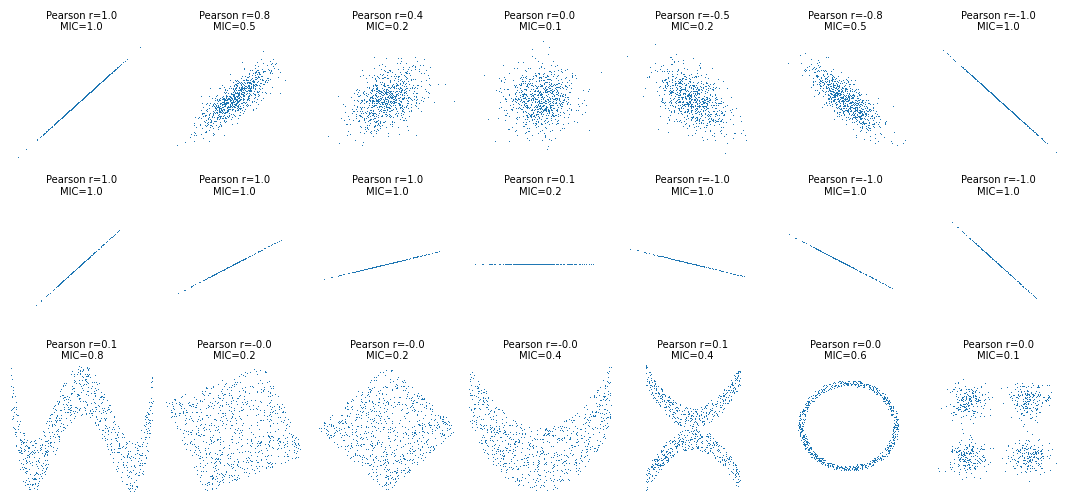

C:\Users\evama\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


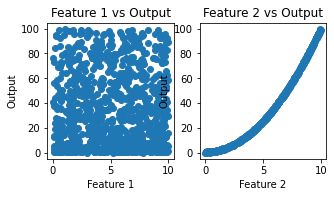

Mutual information: [0.04213158 4.08738962]


In [16]:
# Example of normalized mutual information calculation using the sklearn library mutual information score regression
from sklearn.feature_selection import mutual_info_regression

# Define the input and output variables
X = np.random.rand(1000, 2)*10
y =  X[:, 1]**2+ np.random.rand(1000)

# Plot the data
plt.figure(figsize=(5, 2.5))
plt.subplot(1, 2, 1)
plt.plot(X[:, 0], y, 'o')
plt.xlabel("Feature 1")
plt.ylabel("Output")
plt.title("Feature 1 vs Output")
plt.subplot(1, 2, 2)
plt.plot(X[:, 1], y, 'o')
plt.xlabel("Feature 2")
plt.ylabel("Output")
plt.title("Feature 2 vs Output")
plt.show()

# Calculate the mutual information
mi = mutual_info_regression(X, y)
print(f"Mutual information: {mi}")

In [17]:
# calculate the normalized mutual information dividng by the minimum of the entropies
# Obtain differential entropy of the input variables
num_quantiles = 10
# x0
prob_counts, bins_x0= np.histogram(X[:, 0], bins=num_quantiles, density=True)
bin_width_x0 = bins_x0[1] - bins_x0[0]
# Calculate the differential entropy
entropy_x0 = -np.sum(prob_counts * np.log(prob_counts, where=prob_counts!=0))  * bin_width_x0
print(f"Differential entropy X0: {entropy_x0}")

# x1
prob_counts, bins_x1= np.histogram(X[:, 1], bins=num_quantiles, density=True)
bin_width_x1 = bins_x1[1] - bins_x1[0]
# Calculate the differential entropy
entropy_x1 = -np.sum(prob_counts * np.log(prob_counts, where=prob_counts!=0))  * bin_width_x1
print(f"Differential entropy X1: {entropy_x1}")

# y
prob_counts, bins_y= np.histogram(y, bins=num_quantiles, density=True)
bin_width_y = bins_y[1] - bins_y[0]
# Calculate the differential entropy
entropy_y = -np.sum(prob_counts * np.log(prob_counts, where=prob_counts!=0))  * bin_width_y
print(f"Differential entropy Y: {entropy_y}")


Differential entropy X0: 2.2942478323575406
Differential entropy X1: 2.2931165880152227
Differential entropy Y: 4.398798752202963


C:\Users\evama\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


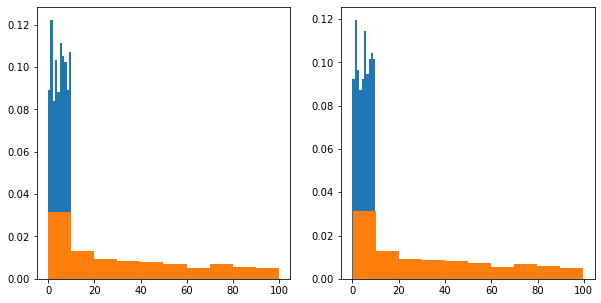

In [18]:
# plot individual histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(X[:, 0], bins=bins_x0, density=True)
plt.hist(y, bins=bins_y, density=True)
plt.subplot(1, 2, 2)
plt.hist(X[:, 1], bins=bins_x1, density=True)
plt.hist(y, bins=bins_y, density=True)
plt.show()


In [19]:
# Calculate the joint entropy using the bins obtained with a 2D histogram
prob_counts, xedges, yedges = np.histogram2d(X[:, 0], y, density=True, bins = [bins_x0, bins_y])
joint_entropy = -np.sum(prob_counts * np.log(prob_counts, where=prob_counts!=0)) * bin_width_x0 * bin_width_y
print(f"joint entropy X0, y: {joint_entropy}")
mi = entropy_x0 + entropy_y - joint_entropy
print(f"Mutual information: {mi}")
nmi = mi / np.min([entropy_x0, entropy_y])
print(f"Normalized mutual information X0, y: {nmi}")


# Calculate the joint entropy using the bins obtained with a 2D histogram
prob_counts, xedges, yedges = np.histogram2d(X[:, 1], y, density=True, bins = [bins_x1, bins_y])
joint_entropy = -np.sum(prob_counts * np.log(prob_counts, where=prob_counts!=0)) * bin_width_x1 * bin_width_y
print(f"joint entropy X1,y: {joint_entropy}")
mi = entropy_x1 + entropy_y - joint_entropy
print(f"Mutual information: {mi}")
nmi = mi / np.min([entropy_x1, entropy_y])
print(f"Normalized mutual information X1,y: {nmi}")

joint entropy X0, y: 6.6643536397606695
Mutual information: 0.028692944799834308
Normalized mutual information X0, y: 0.012506471356387768
joint entropy X1,y: 5.037345143464968
Mutual information: 1.6545701967532178
Normalized mutual information X1,y: 0.7215377558213513


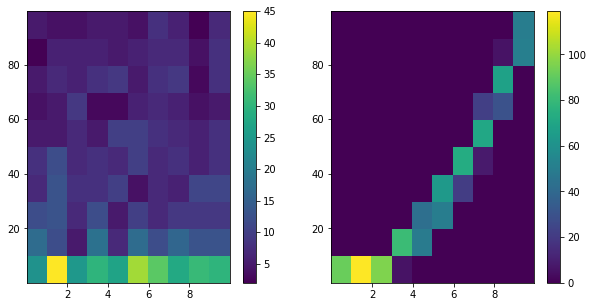

In [20]:
# plot 2d histograms
#set equal colorbar
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist2d(X[:, 0], y, bins=[bins_x0, bins_y])
plt.colorbar()
plt.subplot(1, 2, 2)
plt.hist2d(X[:, 1], y, bins=[bins_x1, bins_y])
plt.colorbar()
plt.show()


In [22]:
#pip install minepy

     -------------------------------------- 497.0/497.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minepy: filename=minepy-1.2.6-cp38-cp38-win_amd64.whl size=55288 sha256=f0bcf12bb0acc0f4b78c35a4681c36f66f537dd536a2f4dc86f5d2d37ba20585
  Stored in directory: c:\users\evama\appdata\local\pip\cache\wheels\38\c1\43\6122536c873081a61af51f929214171d5372f93a29e263a06f
Successfully built minepy
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\evama\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\evama\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
C:\Users\evama\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(

In [23]:
## Code for calculating MIC
from minepy import MINE

mine = MINE(alpha=0.6, c=15, est="mic_approx")
mine.compute_score(x, y)
mic = np.around(mine.mic(), 1)

ValueError: x, y: shape mismatch

### 4.2 Source Code and Channel Th.

**Data compression**, also known as **source coding**, is at the heart of information theory. 
- Related to probabilistic machine learning: if we can model the probability of different kinds of data samples, then we can assign short code words to the most frequently occuring ones, reserving longer encodings for the less frequent ones,

- Lossless compression*: Discrete data, such as natural language, can always be compressed in such a way that we can uniquely recover the original data.

- **Claude Shannon** proved that the expected number of bits needed to losslessly encode some data
coming from distribution p is at least H(p). This is known as the source coding theorem. 

Achieving this lower bound requires coming up with good probability models, as well as good ways to design
codes based on those models. Because of the non-negativity of the KL divergence, $H_{ce}(p, q) ≥ H(p)$,
so if we use any model q other than the true model p to compress the data, it will take some excess
bits. The number of excess bits is exactly $D_{KL}(p ∥ q)$

**Error-correcting codes (channel coding)**

The idea behind error correcting codes is to add redundancy to a signal *x*, such that when it is sent over to the receiver via a noisy transmission line (such as a cell phone connection), the receiver can recover from any corruptions that might occur to the signal. 

A common way to increase the chance of being able to recover the original signal is to add **parity
check bits** to it before sending it. 

These are deterministic functions of the original signal, which specify if the sum of the input bits is odd or even. This provides a form of redundancy, so that if one bit is corrupted, we can still infer its value, assuming the other bits are not flipped.

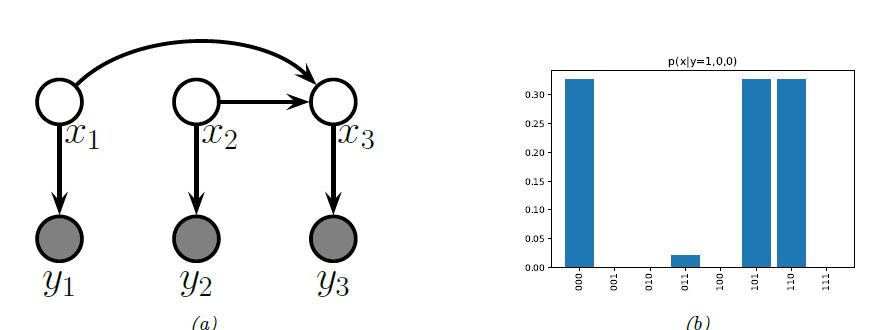

A simple error-correcting code. $x_i$ are the sent bits, $y_i$ are the received bits. $x_3$ is an
even parity check bit computed from $x_1$ and $x_2$. (b) Posterior over codewords given that $y = (1, 0, 0)$ the probability of a bit flip is 0.2.

## 5. Exercises

Consider the joint distribution $p(X, Y)$:


\begin{array}{c|cccc}
& x=1 & x=2 & x=3 & x=4 \\
\hline
y=1 & \frac{1}{8} & \frac{1}{16} & \frac{1}{32} & \frac{1}{32} \\
y=2 & \frac{1}{16} & \frac{1}{8} & \frac{1}{32} & \frac{1}{32} \\
y=3 & \frac{1}{16} & \frac{1}{16} & \frac{1}{16} & \frac{1}{16} \\
y=4 & \frac{1}{4} & 0 & 0 & 0 \\
\end{array}

*For all calculations, use base 2*
1. What is the joint entropy $H(X, Y)$?

2. What are the marginal entropies $H(X)$ and $H(Y)$?

3. Compute $H(X|Y=y)$ for each value of $y$. Does the posterior entropy on $X$ ever increase given an observation of $Y$? What other conclusion can be drawn from the values obtained?
   
4. What is the mutual information between $X$ and $Y$?

5. Obtain the normalized mutual information between $X$ and $Y$. Are they correlated?

Now, all of these questions shall be answered via Python code. Below, function placeholders has been designed for you. Your job is to fill each function with youw own code to answer the previous questions. Unit tests are provided in the ```test_ch1_students.py``` file to test the result of each function. 7 out of 10 points of your mark in this notebook are based on this tests. Your teachers have some extra tests that would be performed on your functions that determine the other 3 points. The teachers reserve the right to modify your mark in case any form of cheating is detected.

In [1]:
from test_ch1.test_ch1_students import *


In [2]:
import numpy as np

In [3]:
p_xy = np.array([[1/8, 1/16, 1/32, 1/32], [1/16, 1/8, 1/32, 1/32], [1/16, 1/16, 1/16, 1/16], [1/4, 0, 0, 0]])
#p_x = p_xy.sum(axis=1)
#p_y = p_xy.sum(axis=0)

In [4]:
#print(p_x)

In [5]:
def joint_entropy(p_xy):
    """Calculate the joint entropy H(X, Y).

    Args:
        p_xy (np.array): Joint probability distribution p(X, Y).

    Returns:
        float: Joint entropy H(X, Y).
    """
    
        # Calculate the joint entropy H(X, Y)
    
    log_p_xy = np.log2(np.where(p_xy > 0, p_xy, 1)) #Reemplaza 0 con 1 para evitar el warning de dividir entre 0
    
    joint_entropy = -np.nansum(p_xy * log_p_xy)

    # Print the result
    print(f"Joint entropy of X and Y: {joint_entropy}")
    return joint_entropy

# QUESTION 1:  What is the joint entropy  𝐻(𝑋,𝑌)?
# Joint entropy of H(X,Y) is 3.375

In [6]:
test_joint_entropy(joint_entropy)

Joint entropy of X and Y: 3.375
Test passed


In [7]:
def marginal_distribution(p_xy, axis):
    """Calculate the marginal distribution p(X) or p(Y).

    Args:
        p_xy (np.array): Joint probability distribution p(X, Y).
        axis (int): Axis along which to calculate the marginal distribution (0 for Y, 1 for X).

    Returns:
        np.array: Marginal distribution p(X) or p(Y).
    """
    
    p = p_xy.sum(axis=axis)
        
    return p

In [8]:
p_x = marginal_distribution(p_xy, 1)
p_y = marginal_distribution(p_xy, 0)

In [9]:
test_marginal_distribution(marginal_distribution)

Test passed


In [10]:
def marginal_entropy(p):
    """Calculate the marginal entropy H(X) or H(Y).

    Args:
        p (np.array): Marginal probability distribution p(X) or p(Y).

    Returns:
        float: Marginal entropy H(X) or H(Y).
    """
    
    # Calculate the entropies of the marginal distributions 
    entropy_p = -np.sum(p * np.log2(p, where=p != 0))
    
    
    return entropy_p

# QUESTION 2. What are the marginal entropies  𝐻(𝑋) and  𝐻(𝑌) ?
# Marginal entropy of H(X) is 2
# Marginal entropy of H(Y) is 1.75

In [11]:
print("Marginal entropy x: ", marginal_entropy(p_x))
print("Marginal entropy y: ", marginal_entropy(p_y))

Marginal entropy x:  2.0
Marginal entropy y:  1.75


In [12]:
test_marginal_entropy(marginal_entropy)

Test passed


In [13]:
def conditional_entropy(p_xy, p_y):
    """Calculate the conditional entropies H(X|Y=y) for all values of y.

    Args:
        p_xy (np.array): Joint probability distribution p(X, Y).
        p_y (np.array): Marginal probability distribution p(Y).

    Returns:
        list: Conditional entropies H(X|Y=y) for each y.
    
    """
    
    num_y = p_y.shape[0] # Para generalizar
    
    conditional_entropy_list = []
    
    for i in range(num_y):
        
        p_xy_sep = p_xy[i,:]
        
        
        if p_y[i]!=0:
            
            p_x_given_y = p_xy_sep / p_y[i]
            
            log_p_x_given_y = np.log2(np.where(p_x_given_y > 0, p_x_given_y, 1))  # Reemplaza ceros con 1 para evitar el warning de dividir entre 0 en el log

            conditional_entropy = -np.sum(p_x_given_y * log_p_x_given_y, where=p_x_given_y != 0)
            conditional_entropy_list.append(conditional_entropy)
    
#    print(conditional_entropy_list)

    return conditional_entropy_list

# QUESTION 3. Compute  𝐻(𝑋|𝑌=𝑦) for each value of 𝑦. Does the posterior entropy on 𝑋 ever increase given an observation of 𝑌? What other conclusion can be drawn from the values obtained?
# 𝐻(𝑋|𝑌=𝑦) is [1.75, 1.75, 2.0, 0.0]
# Yes, from y=2 to y=3. 
# Other conclusions: The observation of Y affects the uncertaintly about X differently, whereas from y = 2 to y = 3 increases, in y = 4, observing Y can completely resolve the uncertainty about X. 

In [14]:
test_conditional_entropy(conditional_entropy)

Test passed


In [15]:
def mutual_information(H_X, H_Y, H_XY):
    """Calculate the mutual information I(X;Y).

    Args:
        H_X (float): Marginal entropy H(X).
        H_Y (float): Marginal entropy H(Y).
        H_XY (float): Joint entropy H(X, Y).

    Returns:
        float: Mutual information I(X;Y).
    """
    
    mutual_information = H_X + H_Y - H_XY
    
    
    #print(mutual_information)
    return mutual_information

# QUESTION 4. What is the mutual information between  𝑋 and 𝑌?
# Mutual information is 1.125

In [16]:
test_mutual_information(mutual_information)

Test passed


In [17]:
def normalized_mutual_information(I_XY, H_X, H_Y):
    """Calculate the normalized mutual information.

    Args:
        I_XY (float): Mutual information I(X;Y).
        H_X (float): Marginal entropy H(X).
        H_Y (float): Marginal entropy H(Y).

    Returns:
        float: Normalized mutual information.
    """
    
    nmi = I_XY / (min(H_X, H_Y))
    print(nmi)
    return nmi

# QUESTION 5. Obtain the normalized mutual information between  𝑋  and  𝑌 . Are they correlated?
# Normalized mutual information is 0.6428571428571429. 
# Yes, NMI is a standardized version of MI, reflecting MI as a fraction of the maximum possible mutual information given the entropies, so they are directly related.

In [18]:
test_normalized_mutual_information(normalized_mutual_information)

0.6428571428571429
Test passed


In [19]:
run_tests(joint_entropy, marginal_distribution, marginal_entropy, conditional_entropy, mutual_information, normalized_mutual_information)

Joint entropy of X and Y: 3.375
0.6428571428571429
Total tests passed: 6 / 6 -> 100.0%
